In [15]:
import os
import numpy as np
import scipy.stats as st
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rc('figure', dpi=160)
plt.rc('legend', fontsize=6)

In [ ]:
# etd_algs = ['ace-etd-episodic', 'ace-etd-uniform', 'lv-ace-etd-episodic', 'lv-ace-etd-uniform', 'offpac-etd-uniform']
# tdrc_algs = ['ace-tdrc-episodic', 'ace-tdrc-uniform', 'lv-ace-tdrc-episodic', 'lv-ace-tdrc-uniform', 'offpac-tdrc-uniform']
# algs = etd_algs + tdrc_algs
# for alg in algs:
#     concatenate_performance('/home/s/sutton/graves/scratch/actor-critic-with-emphatic-weightings/virtual-office/' + alg)

# concatenate_performance('/home/s/sutton/graves/scratch/actor-critic-with-emphatic-weightings/virtual-office/offpac-tdrc-uniform')

In [45]:
def concatenate_performance(dir_path):
    path = Path(dir_path)
    (_, dir_names, _) = next(os.walk(path))  # Get subdirectories
    memmaps = []
    for sweep_dir in [d for d in dir_names if d.startswith("sweep")]:  # Filter for "sweep" prefix
        # Open the performance memmaps in each subdirectory:
        memmaps.append(np.lib.format.open_memmap(str(path / sweep_dir / 'performance.npy'), mode='r'))
    concatenated = np.concatenate(memmaps)  # concatenate all memmaps together (note: loads them all into memory)
    performance_memmap = np.lib.format.open_memmap(str(path / 'concatenated_performance.npy'), shape=concatenated.shape, dtype=concatenated.dtype, mode='w+')
    performance_memmap[:] = concatenated
    del memmaps
    del concatenated
    del performance_memmap
    
def combine_results(results):
    num_configs, num_runs, num_policies, num_evals = results.shape
    mean_evals = np.mean(results, axis=3)
    var_evals = np.var(results, axis=3)
    mean_runs = np.mean(mean_evals, axis=1)
    sem_runs = np.sqrt(np.sum(var_evals / num_evals, axis=1)) / num_runs
    cs = sem_runs * st.t.ppf((1.0 + 0.95) / 2, num_evals - 1)
    return mean_runs, cs

def load_results(alg):
    return np.lib.format.open_memmap('/home/s/sutton/graves/scratch/actor-critic-with-emphatic-weightings/virtual-office/'+alg+'/concatenated_performance.npy', mode='r')['results']

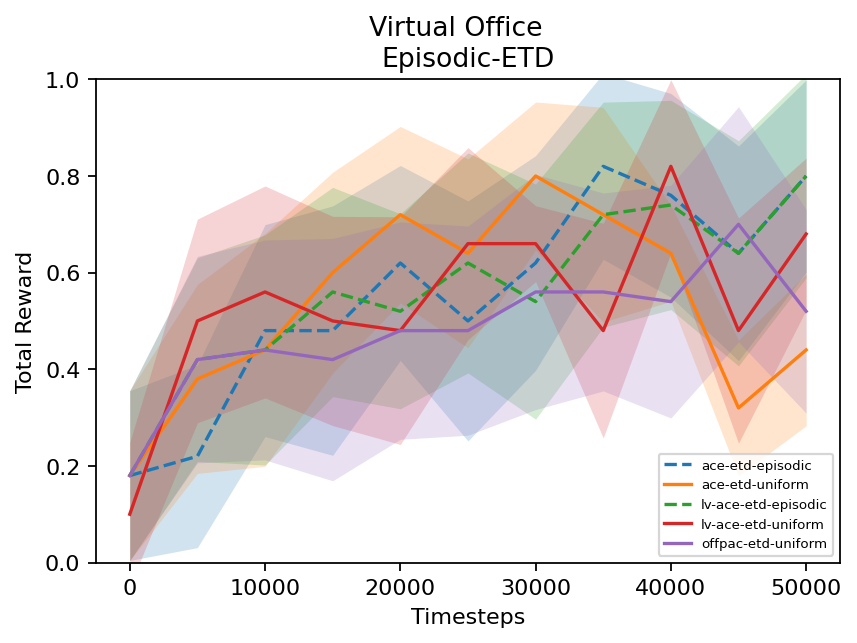

In [114]:
fig, ax = plt.subplots()
ax.set_title('Episodic-ETD')
plt.suptitle('Virtual Office')

etd_algs = ['ace-etd-episodic', 'ace-etd-uniform', 'lv-ace-etd-episodic', 'lv-ace-etd-uniform', 'offpac-etd-uniform']

for alg in etd_algs:
    results = load_results(alg)
    means, cs = combine_results(results['episodic'])
    best_config = np.nanargmax(means.sum(axis=1))
    x = results[best_config]['timesteps'][0]
    y = means[best_config]
    linestyle = '--' if 'episodic' in alg else '-'
    lines = ax.plot(x, y, label=alg, linestyle=linestyle)
    ax.fill_between(x, y-cs[best_config], y+cs[best_config], alpha=0.2, facecolor=lines[0]._color, edgecolor=lines[0]._color, linewidth=0)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Total Reward')
ax.set_ylim(0,1)
ax.legend(loc="lower right")

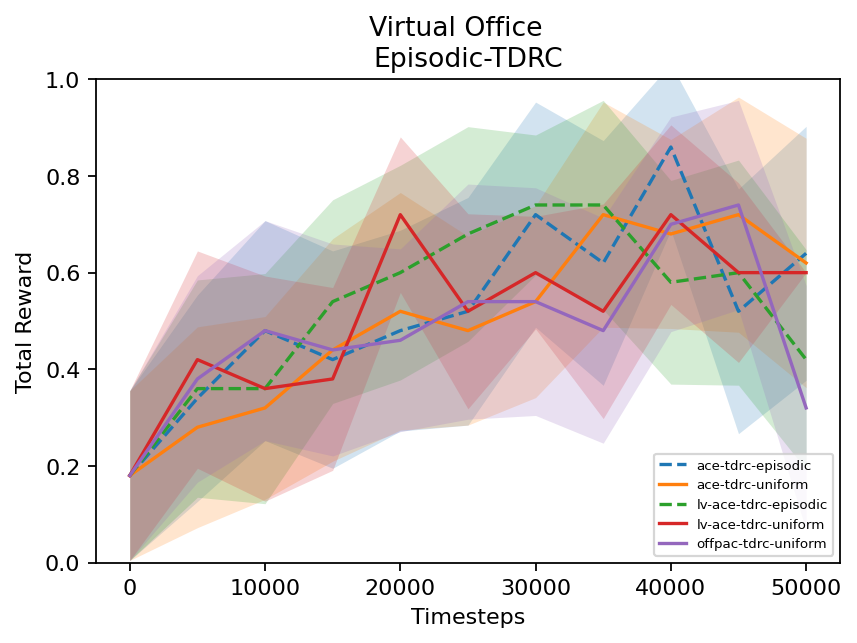

In [115]:
fig, ax = plt.subplots()
ax.set_title('Episodic-TDRC')
plt.suptitle('Virtual Office')

tdrc_algs = ['ace-tdrc-episodic', 'ace-tdrc-uniform', 'lv-ace-tdrc-episodic', 'lv-ace-tdrc-uniform', 'offpac-tdrc-uniform']

for alg in tdrc_algs:
    results = load_results(alg)
    means, cs = combine_results(results['episodic'])
    best_config = np.nanargmax(means.sum(axis=1))
    x = results[best_config]['timesteps'][0]
    y = means[best_config]
    linestyle = '--' if 'episodic' in alg else '-'
    lines = ax.plot(x, y, label=alg, linestyle=linestyle)
    ax.fill_between(x, y-cs[best_config], y+cs[best_config], alpha=0.2, facecolor=lines[0]._color, edgecolor=lines[0]._color, linewidth=0)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Total Reward')
ax.set_ylim(0,1)
ax.legend(loc="lower right")

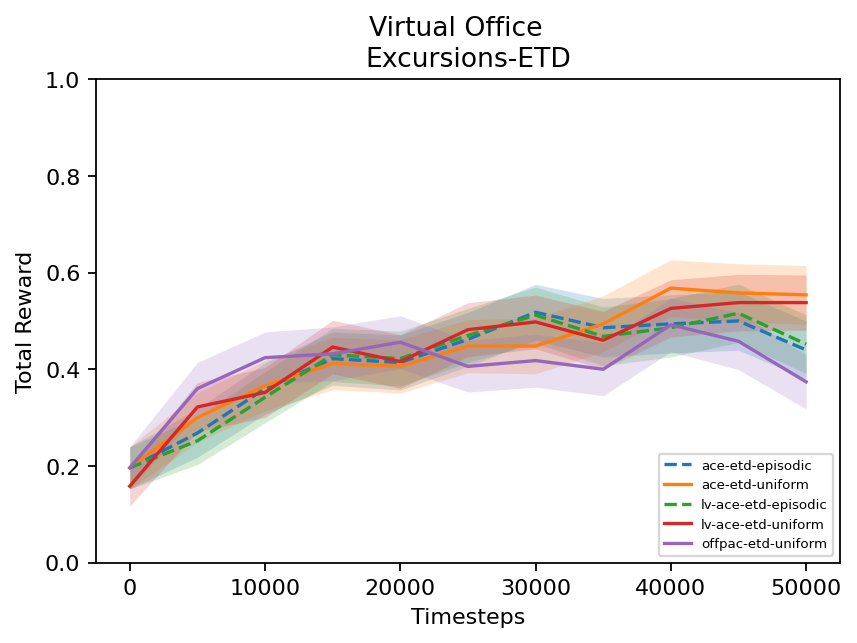

In [116]:
fig, ax = plt.subplots()
ax.set_title('Excursions-ETD')
plt.suptitle('Virtual Office')

etd_algs = ['ace-etd-episodic', 'ace-etd-uniform', 'lv-ace-etd-episodic', 'lv-ace-etd-uniform', 'offpac-etd-uniform']

for alg in etd_algs:
    results = load_results(alg)
    means, cs = combine_results(results['excursions'])
    best_config = np.nanargmax(means.sum(axis=1))
    x = results[best_config]['timesteps'][0]
    y = means[best_config]
    linestyle = '--' if 'episodic' in alg else '-'
    lines = ax.plot(x, y, label=alg, linestyle=linestyle)
    ax.fill_between(x, y-cs[best_config], y+cs[best_config], alpha=0.2, facecolor=lines[0]._color, edgecolor=lines[0]._color, linewidth=0)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Total Reward')
ax.set_ylim(0,1)
ax.legend(loc="lower right")

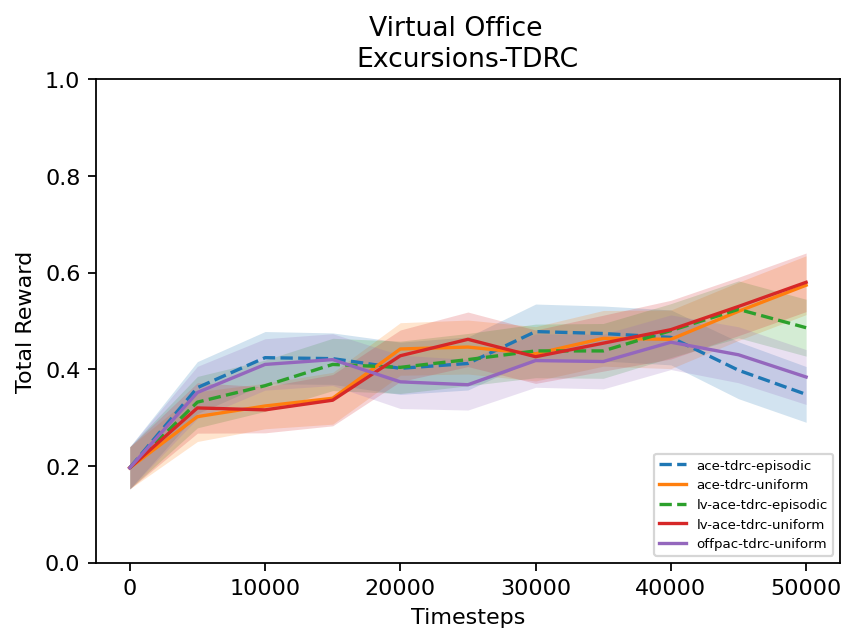

In [117]:
fig, ax = plt.subplots()
ax.set_title('Excursions-TDRC')
plt.suptitle('Virtual Office')

tdrc_algs = ['ace-tdrc-episodic', 'ace-tdrc-uniform', 'lv-ace-tdrc-episodic', 'lv-ace-tdrc-uniform', 'offpac-tdrc-uniform']

for alg in tdrc_algs:
    results = load_results(alg)
    means, cs = combine_results(results['excursions'])
    best_config = np.nanargmax(means.sum(axis=1))
    x = results[best_config]['timesteps'][0]
    y = means[best_config]
    linestyle = '--' if 'episodic' in alg else '-'
    lines = ax.plot(x, y, label=alg, linestyle=linestyle)
    ax.fill_between(x, y-cs[best_config], y+cs[best_config], alpha=0.2, facecolor=lines[0]._color, edgecolor=lines[0]._color, linewidth=0)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Total Reward')
ax.set_ylim(0,1)
ax.legend(loc="lower right")

In [8]:
# # Load E-ACE results:
# eace_memmap = np.lib.format.open_memmap('/home/s/sutton/graves/scratch/actor-critic-with-emphatic-weightings/virtual-office4/e-ace/concatenated_performance.npy', mode='r')
# eace_results = eace_memmap['performance']['results']
# eace_num_configs, eace_num_runs, eace_num_policies, eace_num_eval_runs = eace_results.shape
# eace_parameters = eace_memmap['parameters']
# eace_mean_results, eace_sem_results = average_results(eace_memmap)
# eace_total_return = eace_mean_results.sum(axis=1)

In [ ]:
# # Load OffPAC results:
# op_memmap = np.lib.format.open_memmap('/scratch/s/sutton/graves/actor-critic-with-emphatic-weightings/virtual-office/offpac-tdrc-uniform/concatenated_performance.npy', mode='r')
# op_results = op_memmap['results']['episodic']
# op_num_configs, op_num_runs, op_num_policies, op_num_eval_runs = op_results.shape
# op_parameters = op_memmap['parameters']
# op_mean_results, op_sem_results = average_results(op_memmap)
# op_total_return = op_mean_results.sum(axis=1)

In [62]:
# # Load OffPAC results:
# eop_memmap = np.lib.format.open_memmap('/home/s/sutton/graves/scratch/actor-critic-with-emphatic-weightings/virtual-office4/e-offpac/concatenated_performance.npy', mode='r')
# eop_results = eop_memmap['performance']['results']
# eop_num_configs, eop_num_runs, eop_num_policies, eop_num_eval_runs = eop_results.shape
# eop_parameters = eop_memmap['parameters']
# eop_mean_results, eop_sem_results = average_results(eop_memmap)
# eop_total_return = eop_mean_results.sum(axis=1)

In [ ]:
# # Load ACE results:
# ace_memmap = np.lib.format.open_memmap('/home/s/sutton/graves/scratch/actor-critic-with-emphatic-weightings/virtual-office2/ace/concatenated_performance.npy', mode='r')
# ace_results = ace_memmap['performance']['results']
# ace_num_configs, ace_num_runs, ace_num_policies, ace_num_eval_runs = ace_results.shape
# ace_parameters = ace_memmap['parameters']
# ace_mean_results, ace_sem_results = average_results(ace_memmap)
# ace_total_return = ace_mean_results.sum(axis=1)

(0.0, 1.0)

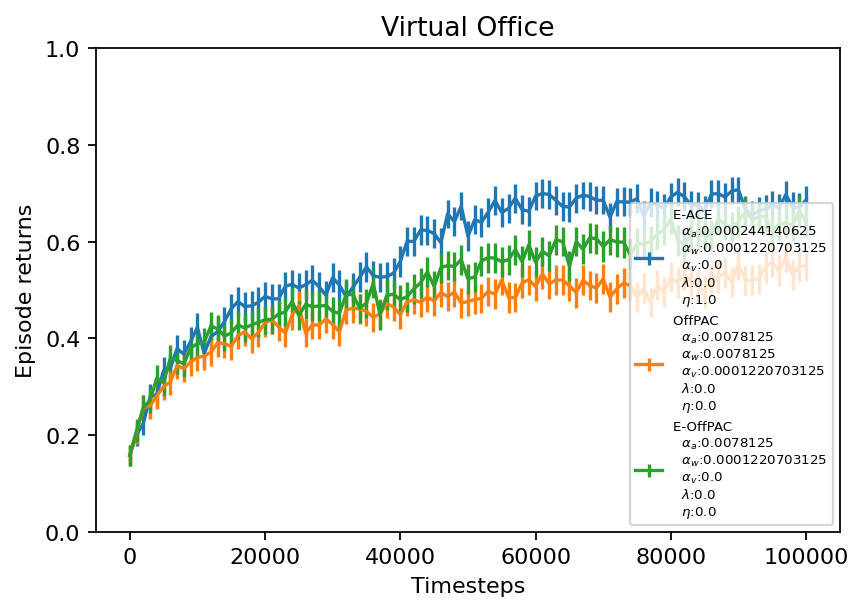

In [64]:
# # Plot the average performance of the best-performing parameter values (according to Area Under Curve) for each method:
# fig, ax = plt.subplots()

# # Plot E-ACE results:
# eace_best_config = np.nanargmax(eace_total_return)
# x = eace_memmap['performance'][eace_best_config]['timesteps'][0]
# y = eace_mean_results[eace_best_config]
# cis = eace_sem_results[eace_best_config] * st.t.ppf((1.0 + 0.95) / 2, eace_num_eval_runs - 1)
# label = create_label(eace_parameters[eace_best_config])
# ax.errorbar(x, y, yerr=[cis, cis], label='E-'+label)

# # Plot OffPAC results:
# op_best_config = np.nanargmax(op_total_return)
# x = op_memmap['performance'][op_best_config]['timesteps'][0]
# y = op_mean_results[op_best_config]
# cis = op_sem_results[op_best_config] * st.t.ppf((1.0 + 0.95) / 2, op_num_eval_runs - 1)
# label = create_label(op_parameters[op_best_config])
# ax.errorbar(x, y, yerr=[cis, cis], label=label)

# # Plot E-OffPAC results:
# eop_best_config = np.nanargmax(eop_total_return)
# x = eop_memmap['performance'][eop_best_config]['timesteps'][0]
# y = eop_mean_results[eop_best_config]
# cis = eop_sem_results[eop_best_config] * st.t.ppf((1.0 + 0.95) / 2, eop_num_eval_runs - 1)
# label = create_label(eop_parameters[eop_best_config])
# ax.errorbar(x, y, yerr=[cis, cis], label='E-'+label)

# # # Plot ACE results:
# # ace_best_config = np.nanargmax(ace_total_return)
# # x = ace_memmap['performance'][ace_best_config]['timesteps'][0]
# # y = ace_mean_results[ace_best_config]
# # cis = ace_sem_results[ace_best_config] * st.t.ppf((1.0 + 0.95) / 2, ace_num_eval_runs - 1)
# # label = create_label(ace_parameters[ace_best_config])
# # ax.errorbar(x, y, yerr=[cis, cis], label=label)

# plt.legend(loc="lower right")
# plt.title('Virtual Office')
# plt.xlabel('Timesteps')
# plt.ylabel('Episode returns')
# plt.ylim(0,1)

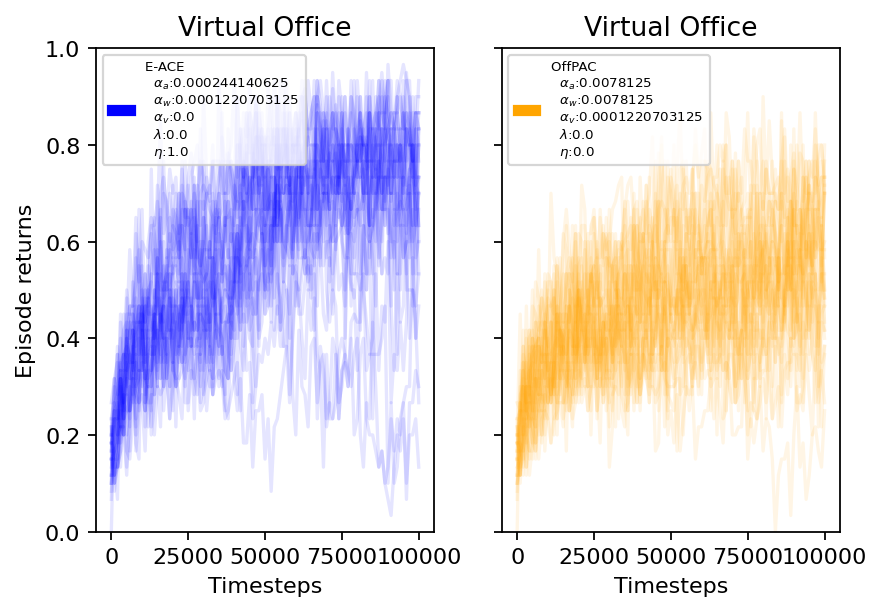

In [28]:
# Plot each run

import matplotlib.patches as mpatches

fig, axes = plt.subplots(1,2, sharex=True, sharey=True)

# Plot E-ACE results:
eace_best_config = np.nanargmax(eace_total_return)
x = eace_memmap['performance'][eace_best_config]['timesteps'][0]
eace_runs = np.mean(eace_results[eace_best_config], axis=2)
for eace_run in eace_runs:
    axes[0].plot(x, eace_run, alpha=.1, color='blue')
eace_label = create_label(eace_parameters[eace_best_config])
eace_patch = mpatches.Patch(color='blue', label='E-'+eace_label)

axes[0].set_title('Virtual Office')
axes[0].set_xlabel('Timesteps')
axes[0].set_ylabel('Episode returns')
axes[0].set_ylim(0,1)
axes[0].legend(loc="upper left", handles=[eace_patch])

# Plot OffPAC:
op_best_config = np.nanargmax(op_total_return)
x = op_memmap['performance'][op_best_config]['timesteps'][0]
op_runs = np.mean(op_results[op_best_config], axis=2)
for op_run in op_runs:
    axes[1].plot(x, op_run, alpha=.1, color='orange')
op_label = create_label(op_parameters[op_best_config])
op_patch = mpatches.Patch(color='orange', label=op_label)

axes[1].set_title('Virtual Office')
axes[1].set_xlabel('Timesteps')
axes[1].set_ylim(0,1)
plt.legend(loc="upper left", handles=[op_patch])


In [ ]:
# Visualize state/state-action visits:
# Generate experience:
import gym
import gym_virtual_office
import numpy as np

num_timesteps = 100000

mu = np.array([.23,.3,.27,.2])
state_visits = np.zeros((9,9))

env = gym.make('VirtualOffice-v0').unwrapped
env.seed(14)
rng = env.np_random

env.reset()
assert type(env.agent_pos) is tuple
state_visits[env.agent_pos] += 1
for t in range(num_timesteps):
    a_t = rng.choice(env.action_space.n, p=mu)
    _, r_tp1, terminal, _ = env.step(a_t)

    assert type(env.agent_pos) is tuple
    state_visits[env.agent_pos] += 1
    
    if terminal:
        o_tp1 = env.reset()
        assert type(env.agent_pos) is tuple
        state_visits[env.agent_pos] += 1

# state_visits /=  np.sum(state_visits)
print(state_visits.T)

In [ ]:
print(state_visits.T)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=60, azim=15)
lx= 9
ly= 9
xpos = np.arange(0,lx,1)
ypos = np.arange(0,ly,1)
xpos, ypos = np.meshgrid(xpos+0.25, ypos+0.25)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(lx*ly)
dx = .85 * np.ones_like(zpos)
dy = dx.copy()
dz = (state_visits / np.sum(state_visits)).flatten()
norm = colors.Normalize(dz.min(), dz.max())
color_values = cm.Oranges(norm(dz.tolist()))
ax.bar3d(xpos,ypos,zpos, dx, dy, dz, color=color_values)
# ax.w_xaxis.set_ticklabels(column_names)
# ax.w_yaxis.set_ticklabels(row_names)
# ax.set_xlabel('Letter')
# ax.set_ylabel('Day')
# ax.set_zlabel('Occurrence')
plt.show()

In [36]:
# Do any of the offpac runs diverge?
op_memmap = np.lib.format.open_memmap('/home/s/sutton/graves/scratch/actor-critic-with-emphatic-weightings/virtual-office4/offpac/concatenated_performance.npy', mode='r')
op_results = op_memmap['performance']['results']
op_num_configs, op_num_runs, op_num_policies, op_num_eval_runs = op_results.shape

print(np.isnan(op_memmap['performance']).sum() / op_results)

# op_parameters = op_memmap['parameters']

0.004632098765432099


In [58]:
print(np.isnan(op_mean_results).any(axis=1).sum())
print(op_parameters.dtype.names)
print(op_parameters[np.isnan(op_mean_results).any(axis=1)])

26
('alpha_a', 'alpha_w', 'alpha_v', 'lambda', 'eta', 'gamma')
[(0.25     , 1. , 1.   , 0., 0., 0.99)
 (0.5      , 1. , 1.   , 0., 0., 0.99)
 (0.0625   , 0.5, 1.   , 0., 0., 0.99)
 (0.0625   , 1. , 0.5  , 0., 0., 0.99)
 (0.25     , 0.5, 1.   , 0., 0., 0.99)
 (0.125    , 1. , 1.   , 0., 0., 0.99)
 (0.0625   , 1. , 1.   , 0., 0., 0.99)
 (0.5      , 1. , 0.5  , 0., 0., 0.99)
 (0.03125  , 1. , 0.5  , 0., 0., 0.99)
 (0.25     , 1. , 0.5  , 0., 0., 0.99)
 (1.       , 1. , 1.   , 0., 0., 0.99)
 (0.0078125, 1. , 1.   , 0., 0., 0.99)
 (0.125    , 0.5, 1.   , 0., 0., 0.99)
 (0.015625 , 1. , 1.   , 0., 0., 0.99)
 (0.03125  , 0.5, 1.   , 0., 0., 0.99)
 (0.5      , 1. , 0.25 , 0., 0., 0.99)
 (0.5      , 0.5, 1.   , 0., 0., 0.99)
 (1.       , 0.5, 1.   , 0., 0., 0.99)
 (1.       , 1. , 0.25 , 0., 0., 0.99)
 (0.03125  , 1. , 1.   , 0., 0., 0.99)
 (0.0625   , 1. , 0.25 , 0., 0., 0.99)
 (0.125    , 1. , 0.25 , 0., 0., 0.99)
 (1.       , 1. , 0.5  , 0., 0., 0.99)
 (1.       , 1. , 0.125, 0., 0., 0.99)
 

In [ ]:
# Code to plot the best-performing parameter values subject to constraints (here lambda=0):

# trace_decay_rate = 0.

# fig, ax = plt.subplots()

# # Plot OffPAC results:
# op_mask = (op_parameters['lambda'] == trace_decay_rate)
# op_best_config = np.nanargmax(op_total_return[op_mask])
# x = op_memmap['performance']['timesteps'][0][0]
# y = op_mean_results[op_mask][op_best_config]
# cis = op_sem_results[op_mask][op_best_config] * st.t.ppf((1.0 + 0.95) / 2, op_num_eval_runs - 1)
# label = create_label(op_parameters[op_mask][op_best_config])
# ax.errorbar(x, y, yerr=[cis, cis], label=label)

# # Plot ACE results:
# ace_mask = (ace_parameters['lambda'] == trace_decay_rate)
# ace_best_config = np.nanargmax(ace_total_return[ace_mask])
# x = ace_memmap['performance']['timesteps'][0][0]
# y = ace_mean_results[ace_mask][ace_best_config]
# cis = ace_sem_results[ace_mask][ace_best_config] * st.t.ppf((1.0 + 0.95) / 2, ace_num_eval_runs - 1)
# label = create_label(ace_parameters[ace_mask][ace_best_config])
# ax.errorbar(x, y, yerr=[cis, cis], label=label)

# plt.legend(loc="lower right")
# plt.title('Virtual Office')
# plt.xlabel('Timesteps')
# plt.ylabel('Episode returns')

In [ ]:
# # Code to visualize a learned policy:
# # Currently doesn't work because I need to find a way around openai gym rendering in a new window (which obviously doesn't work on compute canada).

# from src.algorithms.ace import LinearACE
# import gym
# import gym_virtual_office

# env = gym.make('VirtualOffice-v0').unwrapped
# env.seed(14)
# rng = env.np_random

# policies_memmap = np.lib.format.open_memmap('/home/s/sutton/graves/scratch/actor-critic-with-emphatic-weightings/virtual-office/offpac/sweep0/policies.npy', mode='r')
# policy = policies_memmap[op_mask][op_best_config]['policies']['weights'][0][-1]
# actor = LinearACE(*policy.shape, 0.)

# # TODO: write code to create and display a video:
# # o_t = env.reset()['image'].ravel()
# # for t in range(1000):
# #     a_t = rng.choice(env.action_space.n, p=actor.pi(o_t))
# #     o_tp1, r_tp1, terminal, _ = env.step(a_t)
# #     o_tp1 = o_tp1['image'].ravel()
# #     o_t = o_tp1
# #     if terminal:
# #         break

In [ ]:
# def create_label(p):
#     return f'{"OffPAC" if p["eta"] == 0. else "ACE"} \
# \n  $\\alpha_a$:{p["alpha_a"]} \
# \n  $\\alpha_w$:{p["alpha_w"]} \
# \n  $\\alpha_v$:{p["alpha_v"]} \
# \n  $\\lambda$:{p["lambda"]} \
# \n  $\\eta$:{p["eta"]}'